### HW7 (Random Forest Classifier)

##### Netid: aadcosta
##### Seating Pin : 79

### Part 1: Random Forest Classifier with Original citations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

##### Extract features and label for the data

In [2]:
data = pd.read_csv('E:\MS\MS_studies\Sem_2\IntrotoML\HW3\\71-80.csv')

In [3]:
data = data.iloc[:, [3,4,5,6,7,8]]

In [4]:
data

,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022
0,104,99,104,90,70,65
1,64,75,63,47,59,47
2,840,699,668,576,631,613
3,43,57,80,92,81,81
4,8,60,31,102,134,202
...,...,...,...,...,...,...
95,442,443,404,355,385,333
96,1307,1557,1814,1958,1926,1827
97,493,520,450,474,412,338
98,37,30,51,53,67,53


##### Calculate ratio between cit_2021 and cit_2022

In [5]:
data["ratio_21_22"] = round(data["cit_2022"] / data["cit_2021"],2)
data.fillna(0, inplace=True)

In [6]:
data["category"] = pd.cut(data["ratio_21_22"],bins=[-np.inf,1.05, 1.16, np.inf],labels=["Low", "Medium", "High"])

In [7]:
data

,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022,ratio_21_22,category
0,104,99,104,90,70,65,0.93,Low
1,64,75,63,47,59,47,0.80,Low
2,840,699,668,576,631,613,0.97,Low
3,43,57,80,92,81,81,1.00,Low
4,8,60,31,102,134,202,1.51,High
...,...,...,...,...,...,...,...,...
95,442,443,404,355,385,333,0.86,Low
96,1307,1557,1814,1958,1926,1827,0.95,Low
97,493,520,450,474,412,338,0.82,Low
98,37,30,51,53,67,53,0.79,Low


##### Split the data into training and testing sets

In [8]:
X = data.iloc[:, [0,1,2,3,4,5]]
y = data['category']

In [9]:
y

0      Low
1      Low
2      Low
3      Low
4     High
      ... 
95     Low
96     Low
97     Low
98     Low
99    High
Name: category, Length: 100, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

##### Plot the effect of the number of bootstrap samples on model performance

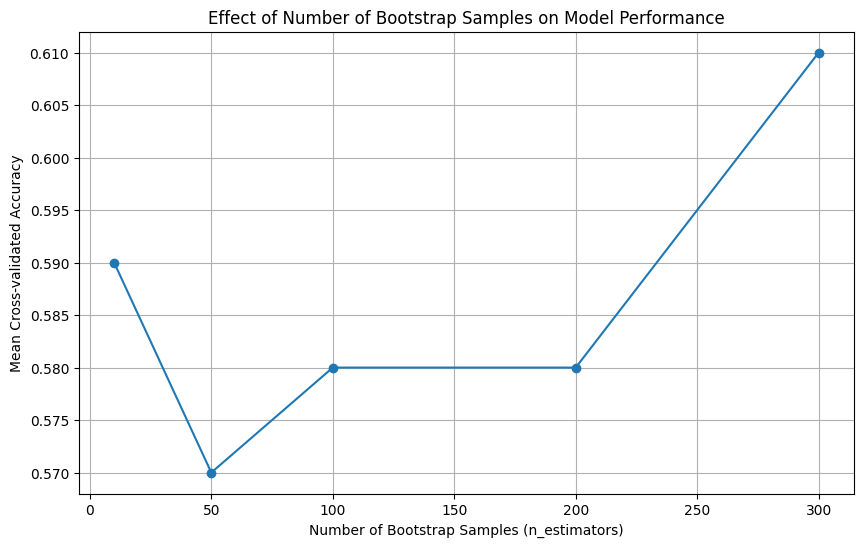

In [10]:
n_estimators_values = [10, 50, 100, 200, 300]
mean_scores = []

for n_estimators in n_estimators_values:
    rf_classifier_varying_estimators = RandomForestClassifier(n_estimators=n_estimators, random_state=20)
    scores = cross_val_score(rf_classifier_varying_estimators, X, y, cv=5, scoring='accuracy')
    mean_scores.append(np.mean(scores))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, mean_scores, marker='o')
plt.title('Effect of Number of Bootstrap Samples on Model Performance')
plt.xlabel('Number of Bootstrap Samples (n_estimators)')
plt.ylabel('Mean Cross-validated Accuracy')
plt.grid(True)
plt.show()

In [11]:
y

0      Low
1      Low
2      Low
3      Low
4     High
      ... 
95     Low
96     Low
97     Low
98     Low
99    High
Name: category, Length: 100, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [13]:
y_train

37       Low
51       Low
35    Medium
65    Medium
31       Low
       ...  
28    Medium
95       Low
15      High
90      High
99      High
Name: category, Length: 80, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

##### Train the Random Forest Classifer model

In [14]:
n_estimators = 300

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=n_estimators,random_state=20)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [15]:
y_pred

array(['Low', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'Medium',
       'Low', 'Low', 'High', 'Low', 'Low', 'High', 'Low', 'Medium', 'Low',
       'Low', 'Low'], dtype=object)

##### Evaluate the model

In [16]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')  # You can choose 'micro', 'macro', or 'weighted'

print(f"F1-Score: {f1:.2f}")

F1-Score: 0.75


In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

        High       0.50      0.67      0.57         3
         Low       0.86      0.86      0.86        14
      Medium       0.50      0.33      0.40         3

    accuracy                           0.75        20
   macro avg       0.62      0.62      0.61        20
weighted avg       0.75      0.75      0.75        20



##### Display feature importance for the initial model

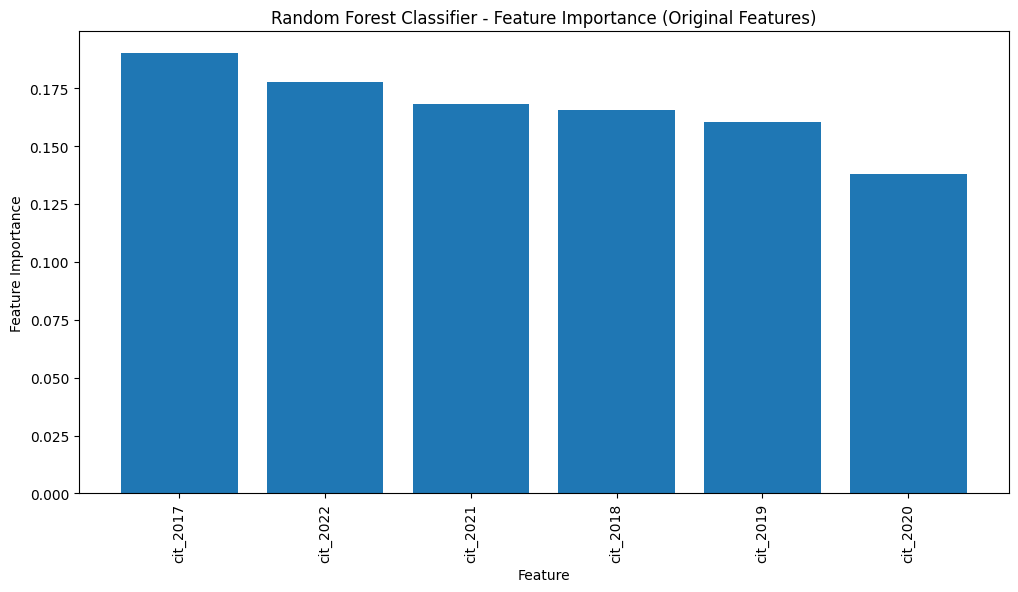

In [18]:
feature_importances = rf_classifier.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Random Forest Classifier - Feature Importance (Original Features)")
plt.show()

### Part 2: Random Forest Classifier with New features

##### Define a function to Create the new features

In [19]:
def calculate_new_features(df):
    for year in range(2017, 2022):
        next_year = year + 1
        feature_name = f'newfeature_{next_year}_{year}'
        data[feature_name] = (data[f'cit_{next_year}'] - data[f'cit_{year}']) / data[f'cit_{year}']
    return df

In [20]:
datanew = calculate_new_features(data)

In [21]:
datanew.loc[[91], :]

,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022,ratio_21_22,category,newfeature_2018_2017,newfeature_2019_2018,newfeature_2020_2019,newfeature_2021_2020,newfeature_2022_2021
91,0,0,5,22,63,121,1.92,High,NaN,inf,3.4,1.863636,0.920635


##### Capture the features

In [22]:
X = datanew.iloc[:, [8,9,10,11,12]]

##### Handling Missing and Nan values(Manual // Can be done via automation)

In [23]:
#X.loc[:, X.isin([np.inf, -np.inf])] = X.replace([np.inf, -np.inf], [8.5, -66])
# Assuming X is a Pandas DataFrame
columns_with_inf = X.columns[X.isin([np.inf, -np.inf]).any()]

# Replace infinite values by creating a copy
X.loc[:, columns_with_inf] = X[columns_with_inf].copy().replace([np.inf, -np.inf], [8.5, -66])
X.fillna(0, inplace=True)

C:\Users\Arlene\AppData\Local\Temp\ipykernel_17976\3668462771.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, columns_with_inf] = X[columns_with_inf].copy().replace([np.inf, -np.inf], [8.5, -66])
C:\Users\Arlene\AppData\Local\Temp\ipykernel_17976\3668462771.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [24]:
X

,newfeature_2018_2017,newfeature_2019_2018,newfeature_2020_2019,newfeature_2021_2020,newfeature_2022_2021
0,-0.048077,0.050505,-0.134615,-0.222222,-0.071429
1,0.171875,-0.160000,-0.253968,0.255319,-0.203390
2,-0.167857,-0.044349,-0.137725,0.095486,-0.028526
3,0.325581,0.403509,0.150000,-0.119565,0.000000
4,6.500000,-0.483333,2.290323,0.313725,0.507463
...,...,...,...,...,...
95,0.002262,-0.088036,-0.121287,0.084507,-0.135065
96,0.191278,0.165061,0.079383,-0.016343,-0.051402
97,0.054767,-0.134615,0.053333,-0.130802,-0.179612
98,-0.189189,0.700000,0.039216,0.264151,-0.208955


In [25]:
y

0      Low
1      Low
2      Low
3      Low
4     High
      ... 
95     Low
96     Low
97     Low
98     Low
99    High
Name: category, Length: 100, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [26]:
nan_rows = X[X.isna().any(axis=1)]

In [27]:
nan_rows

,newfeature_2018_2017,newfeature_2019_2018,newfeature_2020_2019,newfeature_2021_2020,newfeature_2022_2021


##### Plot the effect of the number of bootstrap samples on model performance

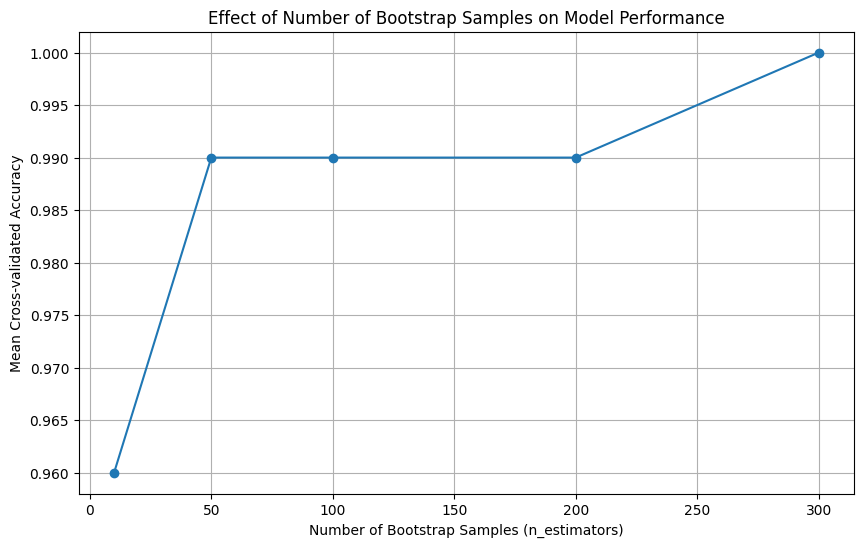

In [28]:
n_estimators_values = [10, 50, 100, 200, 300]
mean_scores = []

for n_estimators in n_estimators_values:
    rf_classifier_varying_estimators = RandomForestClassifier(n_estimators=n_estimators, random_state=20)
    scores = cross_val_score(rf_classifier_varying_estimators, X, y, cv=5, scoring='accuracy')
    mean_scores.append(np.mean(scores))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, mean_scores, marker='o')
plt.title('Effect of Number of Bootstrap Samples on Model Performance')
plt.xlabel('Number of Bootstrap Samples (n_estimators)')
plt.ylabel('Mean Cross-validated Accuracy')
plt.grid(True)
plt.show()

##### Split into train and test set

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

##### Train the Random Forest Classifer model

In [30]:
n_estimators = 300

# Initialize the Random Forest classifier
rf_classifier_new_features = RandomForestClassifier(n_estimators=n_estimators,random_state=20)

# Train the model
rf_classifier_new_features.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- newfeature_2018_2017
- newfeature_2019_2018
- newfeature_2020_2019
- newfeature_2021_2020
- newfeature_2022_2021
Feature names seen at fit time, yet now missing:
- cit_2017
- cit_2018
- cit_2019
- cit_2020
- cit_2021
- ...


##### Evaluate the model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         3
         Low       1.00      1.00      1.00        14
      Medium       1.00      1.00      1.00         3

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



##### Display feature importance for the model with new features

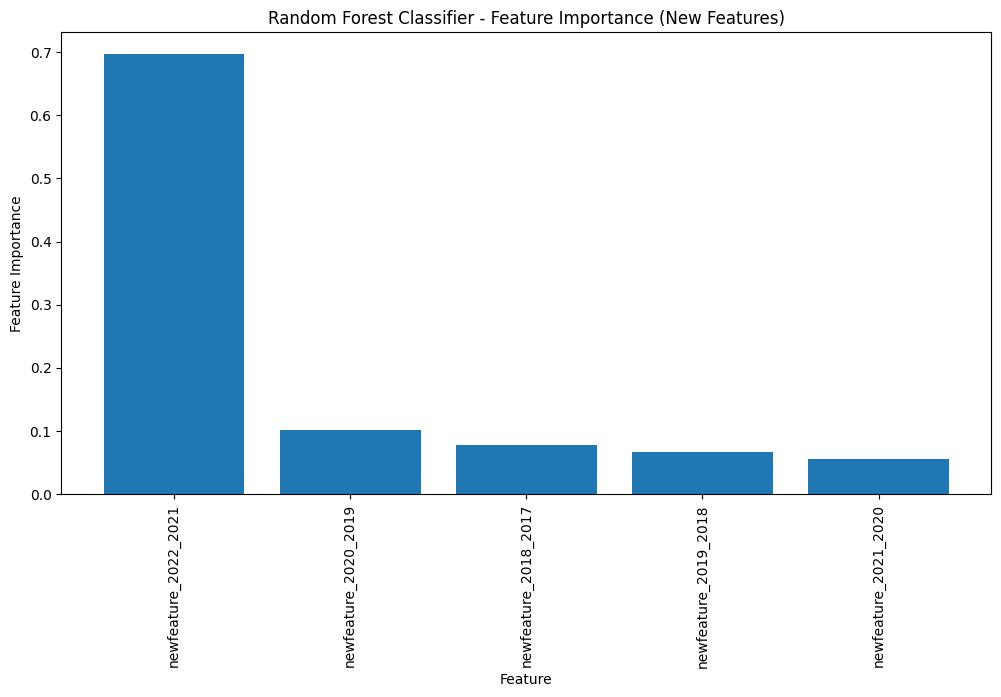

In [ ]:
feature_importances_new = rf_classifier_new_features.feature_importances_
sorted_indices_new = np.argsort(feature_importances_new)[::-1]

# Plot feature importance for the model with new features
plt.figure(figsize=(12, 6))
plt.bar(range(X.shape[1]), feature_importances_new[sorted_indices_new], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_indices_new], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Random Forest Classifier - Feature Importance (New Features)")
plt.show()